In [1]:
%matplotlib inline

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
# plt.style.use('ggplot')

In [2]:
namelist = ['name','timestamp','count']
oo = pd.read_csv('~/projects/uatu/uatu.csv', index_col=False,names=namelist)

In [3]:
df2 = oo.fillna(0)

In [4]:
names = oo['name'].unique()

In [5]:
names

array(['camera_1', 'camera_2', 'camera_3', 'camera_4', 'camera_5',
       'camera_6', 'camera_7', 'camera_8', 'camera_9', 'camera_10',
       'camera_11', 'camera_12', 'camera_13', 'camera_14', 'camera_15',
       'camera_16', 'camera_17', 'camera_18', 'camera_19', 'camera_20',
       'camera_21', 'camera_22', 'camera_23', 'camera_24'], dtype=object)

In [7]:
oo.reset_index()
grouped = oo.groupby('name').max()
grouped

,timestamp,count
name,,
camera_1,1.579981e+09,NaN
camera_10,1.579981e+09,NaN
camera_11,1.579981e+09,2.0
camera_12,1.579981e+09,0.0
camera_13,1.579981e+09,4.0
camera_14,1.579981e+09,7.0
camera_15,1.579981e+09,9.0
camera_16,1.579981e+09,9.0
camera_17,1.579981e+09,9.0


Text(0.5, 1.0, 'people count vs camera position')

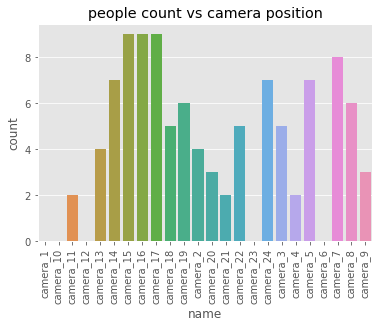

In [37]:
sorted_by_camera = grouped.sort_values('name', )
sorted_by_camera.reset_index(inplace=True)
chart = sns.barplot(data = sorted_by_camera, x = 'name', y= 'count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('people count vs camera position')

In [33]:
oo2 = oo.dropna()
oo2['timestamp'] = oo2['timestamp'].apply(lambda t: time.strftime("%d-%m-%y", time.localtime(int(t))))


/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'people count vs hours')

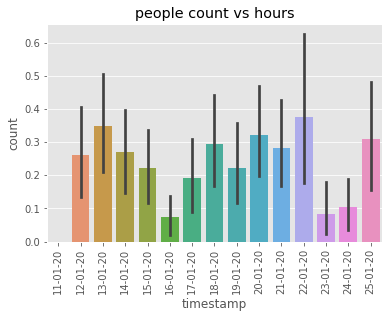

In [48]:
# oo2[(oo2.name == 'camera_17')].plot(x='timestamp', y='count',kind='line')
chart17= sns.barplot(data=oo2[(oo2.name == 'camera_17')], x='timestamp', y='count')
chart17.set_xticklabels(chart17.get_xticklabels(), rotation=90)
chart17.set_title('people count vs hours')

In [53]:
grouped.sort_values('name').info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, camera_1 to camera_9
Data columns (total 2 columns):
timestamp    24 non-null float64
count        21 non-null float64
dtypes: float64(2)
memory usage: 576.0+ bytes


In [84]:
oo.reset_index()
grouped = oo.groupby('name').max()
grouped2 = oo.groupby('name').count()

,timestamp,count
name,,
camera_1,1280,0
camera_10,1280,0
camera_11,1280,786
camera_12,1280,1258
camera_13,1280,1237
camera_14,1280,1254
camera_15,1280,1231
camera_16,1280,1053
camera_17,1280,1259


Text(0.5, 1.0, 'average count vs camera position')

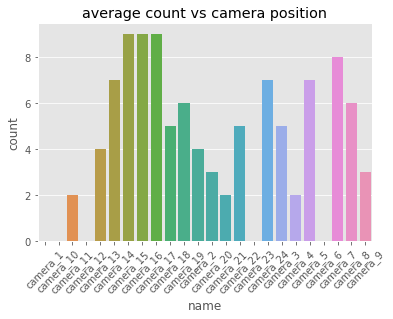

In [83]:
sorted_by_camera = grouped.sort_values('name', )
sorted_by_camera.reset_index(inplace=True)
chart = sns.barplot(data = sorted_by_camera, x = 'name', y= 'count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('average count vs camera position')

Regression/prediction work starts here...

In [116]:
oo[oo['name'] == 'camera_17']
oo2 = oo[oo['name'] == 'camera_17']

In [127]:
oo2.head()

,name,timestamp,count
16,camera_17,1.578771e+09,0.0
40,camera_17,1.578772e+09,0.0
64,camera_17,1.578773e+09,0.0
88,camera_17,1.578774e+09,0.0
112,camera_17,1.578775e+09,0.0


In [146]:
import statsmodels.api as sm

In [ ]:
Check 

In [178]:
oo2 = oo2.fillna(method='ffill')
X = oo2.timestamp
y = oo2['count']

In [179]:
model = sm.OLS(y, X).fit()

In [180]:
predictions = model.predict(y)
model.summary()


/home/paul/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sat, 25 Jan 2020   Prob (F-statistic):                nan
Time:                        19:20:36   Log-Likelihood:                -1252.2
No. Observations:                1280   AIC:                             2506.
Df Residuals:                    1279   BIC:                             2512.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
timestamp   1.489e-10   1.14e-11     13.067      0.000    1.27e-10    1.71e-10
==============================================================================
Omnibus:                     1250.004   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70649.766
Skew:                           4.519   Prob(JB):                         0.00
Kurtosis:                      38.256   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

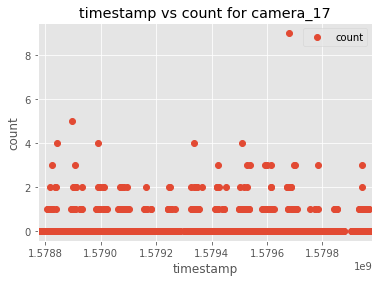

In [181]:
oo2.plot(x='timestamp', y='count', style='o')
plt.title('timestamp vs count for camera_17')
plt.xlabel('timestamp')
plt.ylabel('count')
plt.show()